In [1]:
pip install wget

In [2]:
import wget
from zipfile import ZipFile
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
url = 'https://media.archiveofourown.org/ao3/stats/2021/02/26/20210226-stats.zip'
wget.download(url)

'20210226-stats (3).zip'

In [4]:
ZipFile("/content/20210226-stats.zip").extractall('data')

In [5]:
tags = pd.read_csv('/content/data/tags-20210226.csv')

tags

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


In [6]:
works = pd.read_csv('/content/data/works-20210226.csv')

works

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN
...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+...,NaN


In [7]:
#relevant columns for analisys

#TAGS CSV
tipo = tags['type'] #in Portuguese because 'type' represents something else in python
name = tags['name'] 

#WORKS CSV
work_tags = works['tags'] #tags contained in a specific work
word_count = works['word_count'] 

In [8]:
# PARAMETERS

print(tags.columns)
print(works.columns)

Index(['id', 'type', 'name', 'canonical', 'cached_count', 'merger_id'], dtype='object')
Index(['creation date', 'language', 'restricted', 'complete', 'word_count',
       'tags', 'Unnamed: 6'],
      dtype='object')


In [9]:

# COUNTERS - count how many times a unique value appears, forming a tupple 

tag_counter = Counter(work_tags)
type_counter = Counter(tipo)

#TYPES 
for tipo in tags['type']:
    tag_counter.update()
print(tag_counter)

# TAGS
for Id in work_tags:
    tag_counter.update(str(Id).split('+')) #str marker is used to avoid TypeError along the iteration

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
#DATE
dates = []
frequency = []
date_counter = Counter()

for date in works['creation date']:
    date_counter.update(str(date).split('-'))

for data in date_counter.most_common(20): #selects the 20 most used tags in all works
    dates.append(data[0]) 
    frequency.append(data[1])

print(dates)
print(frequency)

['2020', '2019', '12', '01', '02', '2018', '07', '10', '08', '05', '06', '11', '2017', '04', '03', '09', '2016', '2015', '2014', '2013']
[1622090, 1114625, 977354, 960405, 907583, 896141, 854265, 843660, 834611, 816030, 798996, 792999, 783107, 781127, 773737, 772313, 685178, 552115, 444421, 359948]


Text(0.5, 0, 'utilizações(em milhões)')

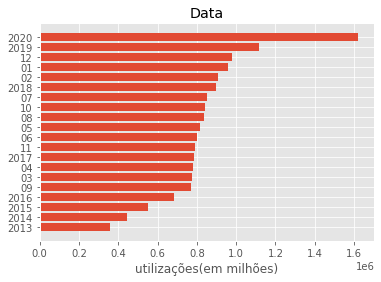

In [11]:
#plotting
dates.reverse()
frequency.reverse()

plt.style.use('ggplot')
plt.barh(dates,frequency)
plt.title('Data')
plt.xlabel('utilizações(em milhões)')


In [12]:
#LANGUAGE

'''languages = []
l_frequency = []
lang_counter = Counter()'''

for langs in works['language']:
    lang_counter.update(str(langs))

for langs in lang_counter.most_common(5): #selects the 5 most used tags in all works
    languages.append(langs[0]) 
    l_frequency.append(langs[1])

print(languages)
print(l_frequency)

['e', 'n', 'h', 'z', 'r']
[6673725, 6589040, 338662, 335183, 172080]


In [34]:
lang = []
ocorrencias = []

teste2 = works.language.value_counts() 
for key, value in teste2.items():
  lang.append(key)
  ocorrencias.append(value)

languages = lang[0:5]
l_frequency = ocorrencias[0:5]

print(lang[0:10])

['en', 'zh', 'ru', 'es', 'fr', 'it', 'id', 'ptBR', 'de', 'pl']


Text(0.5, 0, 'utilizações(em milhões)')

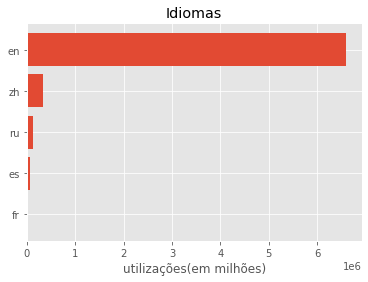

In [35]:
#plotting
languages.reverse()
l_frequency.reverse()

plt.style.use('ggplot')
plt.barh(languages,l_frequency)
plt.title('Idiomas')
plt.xlabel('utilizações(em milhões)')


Text(0.5, 0, 'utilizações(em milhões)')

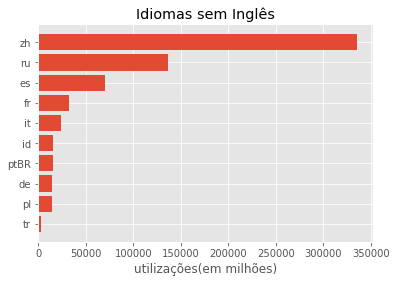

In [36]:
lang_sample = lang[1:11]
sample_freq = ocorrencias[1:11]

lang_sample.reverse()
sample_freq.reverse()

plt.style.use('ggplot')
plt.barh(lang_sample,sample_freq)
plt.title('Idiomas sem Inglês')
plt.xlabel('utilizações(em milhões)')

In [42]:
t = []
apperances = []
    
for tag in tag_counter.most_common(20): #selects the 20 most used tags in all works
    t.append(tag[0]) #contains tag id
    apperances.append(tag[1]) #contains popularity for the ids above

print(apperances)
print(t)

[4046630, 3609746, 2529597, 2198200, 2072394, 1783503, 1362984, 1182041, 1103181, 945215, 713437, 674650, 633759, 510350, 368547, 361299, 353868, 326092, 274631, 273196]
['16', '23', '14', '11', '10', '22', '21', '13', '12', '110', '9', '176', '116', '17', '18', '2379', '2246', '60', '1160', '136512']


In [16]:
def change_tags(i):
  ''' recives a list of tag 'id', sorts their index from such number and returns the corresponding 'name' to said 'id'''
  i.sort
  correct_tags = []
  for number in i:
    index = int(number) -2 #correction rate for the original csv file --> python starts its count in 0 and excel indexes start from 1 (-1), plus the column names occupy row 1 in original file (-2)
    new_tag = name.get(index)
    correct_tags.append(new_tag)
  return correct_tags

change_tags(t)

['No Archive Warnings Apply',
 'M/M',
 'Explicit',
 'General Audiences',
 'Not Rated',
 'F/M',
 'Gen',
 'Mature',
 'Teen And Up Audiences',
 'RPF',
 'Other Media',
 'Warrick Brown',
 'Farscape',
 'Graphic Depictions Of Violence',
 'Major Character Death',
 'Redacted',
 'Tess',
 'Stargate Atlantis',
 'Redacted',
 'Redacted',
 'Redacted',
 'Supernatural',
 'Implied Necrophilia',
 'Batman Begins (2005)',
 'Other',
 'Redacted',
 'Redacted',
 'Redacted',
 'Redacted',
 'Dean Winchester']

In [17]:
def row_search(col_entrada, vlr_entrada, col_saida):
  for index, row in tags.iterrows():
    if row[col_entrada] == vlr_entrada: 
      print(row[col_saida])

In [18]:
tags['type'].unique()

array(['Media', 'Rating', 'ArchiveWarning', 'Category', 'Character',
       'Fandom', 'Relationship', 'Freeform', 'UnsortedTag'], dtype=object)

In [38]:
tags.type.value_counts() 

Freeform          9244331
Relationship      2048295
Character         1509000
UnsortedTag       1460615
Fandom             204858
Category               15
Media                  12
ArchiveWarning          6
Rating                  6
Name: type, dtype: int64

In [19]:
print('média:',word_count.mean(),' ','mediana:',word_count.median())

média: 7213.8505821525505   mediana: 2130.0


Text(0.5, 0, 'utilizações(em milhões)')

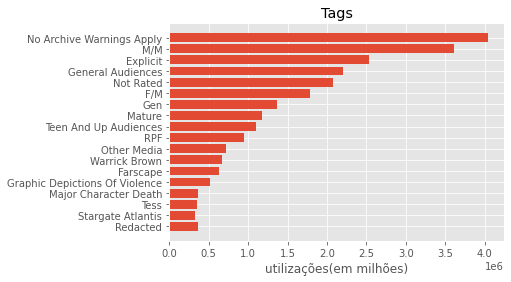

In [47]:
#plotting
apperances.reverse()
tag_names = list(change_tags(t))

plt.style.use('ggplot')
plt.barh(change_tags(t),apperances)
plt.title('Tags')
plt.xlabel('utilizações(em milhões)')


Text(0.5, 0, 'utilizações(em milhões)')

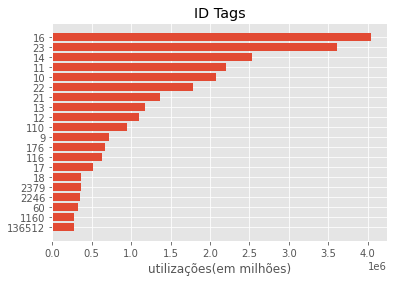

In [45]:
#plotting
apperances.reverse()
tag_names = list(change_tags(t))
t.reverse()

plt.style.use('ggplot')
plt.barh(t,apperances)
plt.title('ID Tags')
plt.xlabel('utilizações(em milhões)')